In [6]:
import os                       # Модуль для работы с ОС (нужен для получения данных из файловой системы)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Графика
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import time                     # Замер времени работы
import graphviz                 # Графика
%matplotlib inline              # Вывод графики в браузере

UsageError: unrecognized arguments: # Вывод графики в браузере


# Оценка качества вина

Датасет содержит информацию о красном и белом винах португальского вина "Vinho Verde", описанного через несколько показателей:
1. тип вина (красное/белое)
2. фиксированная кислотность
3. летучая кислотность
4. лимонная кислота
5. остаточный сахар
6. свободный диоксид серы
7. общий диоксид серы
8. плотность
9. pH
10. сульфаты
11. спирт

На основе указанных параметров эксперты оценивают качество вина по шкале от 0(плохое) до 10(превосходное).  
Выходная переменная: оценка качества.

## Цель задачи
Построить классификатор, который будет предсказывать оценку качества вина по представленным характеристикам

## Описание данных
Число объектов: 6497  
Число признаков: 11  
Количество классов: 7  
Пропущенные значения: есть (NaN)  
Классы не сбалансированы  
Датасет взят с сайта Kaggle: https://www.kaggle.com/rajyellow46/wine-quality

## Вывод данных

In [7]:
data = pd.read_csv('winequalityN.csv', sep = ',', engine = 'python')
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [9]:
data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [10]:
data['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

Из данных выше видим, что среди переменных есть одна категориальная (type - тип object). Среди данных имеются пропущенные значения. Данные разбиваются на 7 классов.

## Обработка данных
### Обработка категориальных признаков  
Для категориального признака type изменим тип с object на тип category для удобства последующей обработки:

In [11]:
data['type'] = data['type'].astype('category')
data['type'].dtype
bi_data = data.replace({'type': {'red': 1, 'white': 0}})

### Обработка выбросов  
Проверим, содержатся ли в данных выбросы, значительно отличающиеся от остальных данных. Построим график зависимости таких параметров как остаточный сахар и общий диоксид серы.

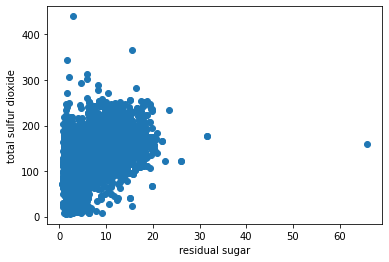

In [12]:
plt.scatter(bi_data['residual sugar'], bi_data['total sulfur dioxide'])
plt.xlabel('residual sugar')
plt.ylabel('total sulfur dioxide')
pass

По графику видно, что выбросы присутствуют. Скорее всего, это ошибочные данные. Посмотрим общую сводку по столбцам, разделив данные на квантили и указав максимальные и минимальные значения для каждого столбца.

In [13]:
q_data = bi_data.quantile([0.005, 0.1, 0.3, 0.5, 0.7, 0.9, 0.995])
pd.concat(objs = [bi_data.agg(['min']), q_data, bi_data.agg(['max'])], join = 'inner')

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
min,0.0,3.800,0.080,0.00,0.6,0.00900,1.0,6.0,0.98711,2.72,0.2200,8.0,3.0
0.005,0.0,4.943,0.115,0.00,0.8,0.01847,3.0,9.0,0.98862,2.86,0.2800,8.6,4.0
0.1,0.0,6.000,0.180,0.14,1.3,0.03100,9.0,30.0,0.99067,3.02,0.3700,9.1,5.0
0.3,0.0,6.500,0.240,0.26,2.0,0.04000,19.0,89.0,0.99280,3.13,0.4500,9.6,5.0
0.5,0.0,7.000,0.290,0.31,3.0,0.04700,29.0,118.0,0.99489,3.21,0.5100,10.3,6.0
0.7,0.0,7.500,0.370,0.37,7.1,0.05800,38.0,148.0,0.99655,3.30,0.5800,11.1,6.0
0.9,1.0,8.800,0.590,0.49,13.0,0.08600,54.0,188.0,0.99840,3.42,0.7200,12.3,7.0
0.995,1.0,12.700,0.965,0.74,19.4,0.24206,86.0,247.0,1.00140,3.70,1.1254,13.6,8.0
max,1.0,15.900,1.580,1.66,65.8,0.61100,289.0,440.0,1.03898,4.01,2.0000,14.9,9.0


Видим, что для столбцов с данными об остаточном сахаре, свободном диоксиде серы, общем диоксиде серы значения максимума сильно отличаются от значений квантиля. Избавимся от выбросов, оставив данные в квантилях от 0.5% до 99.5%. Удаляемые строки выглядят следующим образом:

In [15]:
outliers_rows = bi_data[
(bi_data['fixed acidity'] < q_data.at[0.005, 'fixed acidity']) | (bi_data['fixed acidity'] > q_data.at[0.995, 'fixed acidity']) |
(bi_data['volatile acidity'] < q_data.at[0.005, 'volatile acidity']) | (bi_data['volatile acidity'] > q_data.at[0.995, 'volatile acidity']) |
(bi_data['citric acid'] < q_data.at[0.005, 'citric acid']) | (bi_data['citric acid'] > q_data.at[0.995, 'citric acid']) |
(bi_data['residual sugar'] < q_data.at[0.005, 'residual sugar']) | (bi_data['residual sugar'] > q_data.at[0.995, 'residual sugar']) |
(bi_data['chlorides'] < q_data.at[0.005, 'chlorides']) | (bi_data['chlorides'] > q_data.at[0.995, 'chlorides']) |
(bi_data['free sulfur dioxide'] < q_data.at[0.005, 'free sulfur dioxide']) | (bi_data['free sulfur dioxide'] > q_data.at[0.995, 'free sulfur dioxide']) |
(bi_data['total sulfur dioxide'] < q_data.at[0.005, 'total sulfur dioxide']) | (bi_data['total sulfur dioxide'] > q_data.at[0.995, 'total sulfur dioxide']) |
(bi_data['density'] < q_data.at[0.005, 'density']) | (bi_data['density'] > q_data.at[0.995, 'density']) |
(bi_data['pH'] < q_data.at[0.005, 'pH']) | (bi_data['pH'] > q_data.at[0.995, 'pH']) |
(bi_data['sulphates'] < q_data.at[0.005, 'sulphates']) | (bi_data['sulphates'] > q_data.at[0.995, 'sulphates']) |
(bi_data['alcohol'] < q_data.at[0.005, 'alcohol']) | (bi_data['alcohol'] > q_data.at[0.995, 'alcohol'])
]
outliers_rows

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
7,0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
111,0,7.2,0.27,0.46,18.75,0.052,45.0,255.0,1.00000,3.04,0.52,8.9,5
175,0,6.9,0.23,0.40,7.50,0.040,50.0,151.0,0.99270,3.11,0.27,11.4,6
182,0,6.8,0.28,0.40,22.00,0.048,48.0,167.0,1.00100,2.93,0.50,8.7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6372,1,9.9,0.50,0.50,13.80,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5
6374,1,9.9,0.50,0.50,13.80,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5
6386,1,5.6,0.54,0.04,1.70,0.049,5.0,13.0,0.99420,3.72,0.58,11.4,5
6389,1,5.6,0.54,0.04,1.70,0.049,5.0,13.0,0.99420,3.72,0.58,11.4,5


Посмотрим, насколько теперь отличаются значения максимума/минимума от значений квантилей.

In [16]:
fixed_data = bi_data.drop(outliers_rows.index)
q_data = fixed_data.quantile([0.005, 0.1, 0.3, 0.5, 0.7, 0.9, 0.995])
pd.concat(objs = [fixed_data.agg(['min']), q_data, fixed_data.agg(['max'])], join = 'inner')

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
min,0.0,5.00,0.115,0.00,0.80000,0.01900,3.0,9.000,0.988620,2.86,0.28,8.6,3.0
0.005,0.0,5.10,0.120,0.00,0.90000,0.02100,3.0,10.000,0.988901,2.89,0.30,8.7,4.0
0.1,0.0,6.00,0.180,0.14,1.35000,0.03200,9.0,31.000,0.990760,3.03,0.38,9.1,5.0
0.3,0.0,6.60,0.240,0.26,2.00000,0.04000,20.0,90.000,0.992854,3.14,0.45,9.6,5.0
0.5,0.0,7.00,0.290,0.31,3.00000,0.04700,29.0,119.000,0.994900,3.21,0.51,10.3,6.0
0.7,0.0,7.50,0.370,0.37,7.20000,0.05700,38.0,148.000,0.996500,3.30,0.58,11.0,6.0
0.9,1.0,8.61,0.580,0.49,12.90000,0.08500,54.0,187.000,0.998300,3.42,0.71,12.2,7.0
0.995,1.0,12.00,0.880,0.74,18.19825,0.18386,76.0,236.955,1.000400,3.63,0.98,13.4,8.0
max,1.0,12.70,0.965,0.74,19.40000,0.24100,86.0,247.000,1.001400,3.70,1.12,13.6,9.0


Видим, что значения теперь почти не отличаются от значений квантилей.  
Посторим график для исправленных значений.

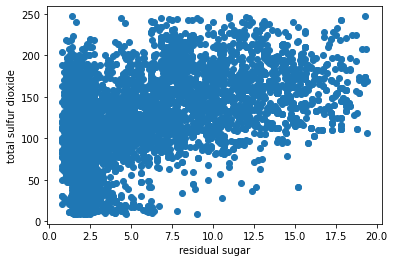

In [17]:
plt.scatter(fixed_data['residual sugar'], fixed_data['total sulfur dioxide'])
plt.xlabel('residual sugar')
plt.ylabel('total sulfur dioxide')
pass

### Обработка пропущенных значений  
Выше мы убедились, что в данных есть пропущенные значения, но их количество несущественно (38 пропущенных значений на 7к строк данных). Все пропущенные значения содержатся в столбцах с численными данными, поэтому заменим их на значение медианы в соответствующих столбцах.

In [18]:
fixed_data.fillna(fixed_data.median(axis = 0, numeric_only = True), axis=0 , inplace=True) 
fixed_data.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Основные характеристики  
Посмотрим среднее, среднеквадратичное отклонение, минимальные и максимальные значения по каждому столбцу, а также матрицу корреляций.

In [19]:
fixed_data.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000
mean,0.238602,7.193319,0.335704,0.315594,5.418918,0.054347,30.356572,116.067304,0.994671,3.218869,0.526968,10.467870,5.822463
std,0.426265,1.184304,0.155775,0.137598,4.590015,0.025694,16.554108,55.073220,0.002835,0.152715,0.132843,1.152919,0.857996
min,0.000000,5.000000,0.115000,0.000000,0.800000,0.019000,3.000000,9.000000,0.988620,2.860000,0.280000,8.600000,3.000000
25%,0.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,79.250000,0.992380,3.110000,0.430000,9.500000,5.000000
50%,0.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,119.000000,0.994900,3.210000,0.510000,10.300000,6.000000
75%,0.000000,7.600000,0.400000,0.390000,8.100000,0.064000,41.000000,156.000000,0.996900,3.320000,0.600000,11.300000,6.000000
max,1.000000,12.700000,0.965000,0.740000,19.400000,0.241000,86.000000,247.000000,1.001400,3.700000,1.120000,13.600000,9.000000


In [20]:
fixed_data.corr()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,1.000000,0.489724,0.668249,-0.226025,-0.359836,0.604801,-0.482496,-0.711572,0.398193,0.356988,0.485432,-0.033312,-0.117583
fixed acidity,0.489724,1.000000,0.231453,0.290849,-0.134362,0.343061,-0.288389,-0.335694,0.438292,-0.210238,0.298583,-0.070393,-0.073319
volatile acidity,0.668249,0.231453,1.000000,-0.416062,-0.214250,0.447950,-0.366247,-0.431195,0.281588,0.276936,0.225919,-0.053739,-0.256090
citric acid,-0.226025,0.290849,-0.416062,1.000000,0.137513,-0.069194,0.164224,0.219524,0.053737,-0.310557,0.028006,0.014094,0.091877
residual sugar,-0.359836,-0.134362,-0.214250,0.137513,1.000000,-0.155487,0.442802,0.508616,0.539012,-0.273924,-0.191339,-0.374650,-0.037284
chlorides,0.604801,0.343061,0.447950,-0.069194,-0.155487,1.000000,-0.227790,-0.332311,0.438027,0.137017,0.300237,-0.286863,-0.218789
free sulfur dioxide,-0.482496,-0.288389,-0.366247,0.164224,0.442802,-0.227790,1.000000,0.726196,0.046565,-0.168119,-0.190493,-0.187355,0.077734
total sulfur dioxide,-0.711572,-0.335694,-0.431195,0.219524,0.508616,-0.332311,0.726196,1.000000,0.032766,-0.260110,-0.294942,-0.272013,-0.035367
density,0.398193,0.438292,0.281588,0.053737,0.539012,0.438027,0.046565,0.032766,1.000000,0.049753,0.257264,-0.708656,-0.310798
pH,0.356988,-0.210238,0.276936,-0.310557,-0.273924,0.137017,-0.168119,-0.260110,0.049753,1.000000,0.255895,0.093704,0.011663


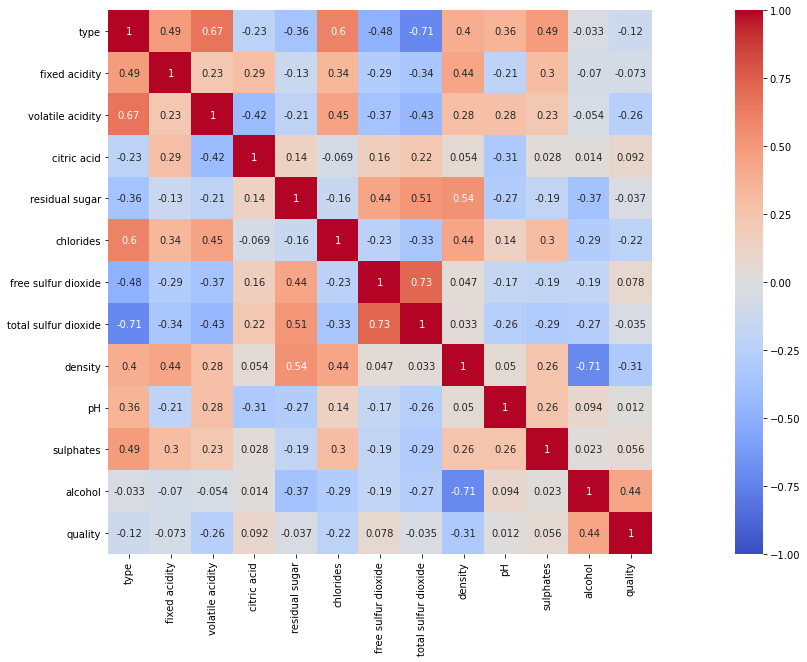

In [21]:
plt.figure(figsize=(30,10))
sns.heatmap(fixed_data.corr(), vmin = -1, vmax = 1, square=True, annot=True, cmap='coolwarm')
pass

По матрице корреляций видна сильная зависимость между свободными диоксидами серы и общими диоксидами серы (что логично), а также прослеживается зависимость между плотностью и остаточным сахаром.

## Нормализация данных  
Проведем нормализацию данных

In [22]:
norm_data = (fixed_data - fixed_data.mean(axis = 0))/fixed_data.std(axis = 0)
norm_data.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6.010000e+03,6.010000e+03,6.010000e+03,6010.000000,6010.000000,6.010000e+03,6.010000e+03,6010.000000,6.010000e+03,6.010000e+03,6.010000e+03,6.010000e+03,6.010000e+03
mean,-1.513302e-16,3.215767e-16,2.648279e-16,0.000000,0.000000,5.674884e-17,5.674884e-17,0.000000,3.846625e-14,-2.080791e-15,-2.648279e-16,4.350744e-16,-2.861087e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.597517e-01,-1.851990e+00,-1.416809e+00,-2.293590,-1.006297,-1.375715e+00,-1.652555e+00,-1.944090,-2.134025e+00,-2.349917e+00,-1.859093e+00,-1.620122e+00,-3.289599e+00
25%,-5.597517e-01,-6.698611e-01,-6.785659e-01,-0.476707,-0.788433,-6.362317e-01,-8.068434e-01,-0.668516,-8.079460e-01,-7.128851e-01,-7.299447e-01,-8.394948e-01,-9.585856e-01
50%,-5.597517e-01,-1.632346e-01,-2.933958e-01,-0.040655,-0.526996,-2.859501e-01,-8.194778e-02,0.053251,8.080936e-02,-5.807241e-02,-1.277322e-01,-1.456040e-01,2.069211e-01
75%,-5.597517e-01,3.433919e-01,4.127494e-01,0.540748,0.584112,3.756931e-01,6.429478e-01,0.725084,7.861707e-01,6.622216e-01,5.497569e-01,7.217595e-01,2.069211e-01
max,1.786209e+00,4.649717e+00,4.039768e+00,3.084384,3.045977,7.264566e+00,3.361306e+00,2.377429,2.373234e+00,3.150510e+00,4.464138e+00,2.716696e+00,3.703441e+00


## Разделение на тестовую и обучающие выборки

In [23]:
input_data = norm_data.drop(['quality'], axis = 1)
output_data = fixed_data['quality']

In [24]:
from sklearn.model_selection import train_test_split
in_train, in_test, out_train, out_test = train_test_split(input_data, output_data, test_size = 0.2, random_state = 42) 
in_train.shape, in_test.shape, out_train.shape, out_test.shape

((4808, 12), (1202, 12), (4808,), (1202,))

In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import plot_confusion_matrix

In [22]:
mlp_model = MLPClassifier(random_state = 42,
                          max_iter=1000)
mlp_model.fit(in_train, out_train)

MLPClassifier(max_iter=1000, random_state=42)

In [23]:
mean_absolute_error(mlp_model.predict(in_train), out_train), mean_absolute_error(mlp_model.predict(in_test), out_test)

(0.37749584026622296, 0.46422628951747086)

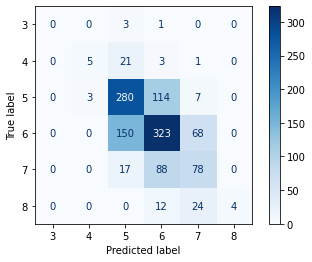

In [24]:
plot_confusion_matrix(mlp_model, in_test, out_test, cmap=plt.cm.Blues)
pass

In [27]:
def mlp_analyze(activation, solver, learning_rate, hidden_layer_sizes, alpha = 0.0001, max_iter = 1000):
    start_time = time.time()
    mlp_model = MLPClassifier(max_iter = max_iter, alpha = alpha,
                                random_state = 0, 
                                activation = activation, 
                                solver = solver, 
                                learning_rate = learning_rate, 
                                hidden_layer_sizes = hidden_layer_sizes)
    mlp_model.fit(in_train, out_train)
    finish_time = time.time()
    return {'iters_count': mlp_model.n_iter_, 
            'train_abs_error':  mean_absolute_error(mlp_model.predict(in_train), out_train),
            'test_abs_error': mean_absolute_error(mlp_model.predict(in_test), out_test),
            'time': finish_time - start_time,
           }

In [26]:
activation = [
    'identity', 
    'logistic', 
    'tanh', 
    'relu',
]
algorithm = pd.DataFrame(data = {
    'solver': ['lbfgs', 'sgd', 'sgd', 'sgd', 'adam'],
    'learning_rate': ['constant', 'constant', 'invscaling', 'adaptive', 'constant']
}) 
algorithm['alg_name'] = algorithm.apply(lambda x: "{0} (learning_rate = {1})".format(x['solver'], x['learning_rate']), axis = 1)
algorithm = algorithm.set_index('alg_name')                    
algorithm

,solver,learning_rate
alg_name,,
lbfgs (learning_rate = constant),lbfgs,constant
sgd (learning_rate = constant),sgd,constant
sgd (learning_rate = invscaling),sgd,invscaling
sgd (learning_rate = adaptive),sgd,adaptive
adam (learning_rate = constant),adam,constant


### Тест различных методов активации и алгоритмов
1 слой

In [38]:
import warnings
warnings.filterwarnings('ignore')

max_iter = 1000 # change it to change analyzing time

def mlp_analyze_by_activation(solver, learning_rate, hidden_layer_sizes, max_iter):
    return pd.Series(index = activation, data = [mlp_analyze(x, solver, learning_rate, hidden_layer_sizes, max_iter = max_iter) for x in activation])


max_iter = 1000 # change it to change analyzing time
mlp_analize_results = algorithm.apply(lambda x: mlp_analyze_by_activation(x['solver'], x['learning_rate'], (100), max_iter = max_iter), axis = 1)
iters_count_table = mlp_analize_results.applymap(lambda x: x['iters_count'])
train_abs_error_table = mlp_analize_results.applymap(lambda x: x['train_abs_error'])
test_abs_error_table = mlp_analize_results.applymap(lambda x: x['test_abs_error'])
time_table = mlp_analize_results.applymap(lambda x: x['time'])

In [39]:
iters_count_table

,identity,logistic,tanh,relu
alg_name,,,,
lbfgs (learning_rate = constant),161,1000,1000,1000
sgd (learning_rate = constant),171,423,1000,1000
sgd (learning_rate = invscaling),768,109,640,482
sgd (learning_rate = adaptive),228,479,1000,1000
adam (learning_rate = constant),43,1000,875,515


In [40]:
train_abs_error_table

,identity,logistic,tanh,relu
alg_name,,,,
lbfgs (learning_rate = constant),0.505408,0.137479,0.054285,0.239601
sgd (learning_rate = constant),0.504576,0.502288,0.446547,0.421797
sgd (learning_rate = invscaling),0.783070,0.630200,0.997712,0.628952
sgd (learning_rate = adaptive),0.503536,0.503536,0.446547,0.421797
adam (learning_rate = constant),0.509567,0.398918,0.331531,0.368968


In [41]:
test_abs_error_table

,identity,logistic,tanh,relu
alg_name,,,,
lbfgs (learning_rate = constant),0.508319,0.502496,0.475042,0.484193
sgd (learning_rate = constant),0.513311,0.509983,0.465058,0.461730
sgd (learning_rate = invscaling),0.753744,0.614809,1.009983,0.619800
sgd (learning_rate = adaptive),0.512479,0.508319,0.465058,0.461730
adam (learning_rate = constant),0.515807,0.450915,0.457571,0.450915


In [42]:
time_table

,identity,logistic,tanh,relu
alg_name,,,,
lbfgs (learning_rate = constant),1.494114,16.741250,23.896295,15.361150
sgd (learning_rate = constant),2.374176,8.155606,20.938070,20.125505
sgd (learning_rate = invscaling),10.328772,2.039151,13.203987,9.886251
sgd (learning_rate = adaptive),3.080230,9.043676,20.973073,20.279020
adam (learning_rate = constant),0.647046,19.793517,21.579125,11.200351


2 слоя

In [32]:
import warnings
warnings.filterwarnings('ignore')

max_iter = 1000 # change it to change analyzing time

mlp_analize_results = algorithm.apply(lambda x: mlp_analyze_by_activation(x['solver'], x['learning_rate'], (100, 100), max_iter = max_iter), axis = 1)
iters_count_table = mlp_analize_results.applymap(lambda x: x['iters_count'])
train_abs_error_table = mlp_analize_results.applymap(lambda x: x['train_abs_error'])
test_abs_error_table = mlp_analize_results.applymap(lambda x: x['test_abs_error'])
time_table = mlp_analize_results.applymap(lambda x: x['time'])

In [33]:
iters_count_table

,identity,logistic,tanh,relu
alg_name,,,,
lbfgs (learning_rate = constant),152,545,230,870
sgd (learning_rate = constant),133,782,1000,1000
sgd (learning_rate = invscaling),341,86,401,306
sgd (learning_rate = adaptive),198,844,1000,1000
adam (learning_rate = constant),33,1000,769,415


In [34]:
train_abs_error_table

,identity,logistic,tanh,relu
alg_name,,,,
lbfgs (learning_rate = constant),0.505408,0.000000,0.000000,0.000000
sgd (learning_rate = constant),0.504368,0.510815,0.411398,0.351913
sgd (learning_rate = invscaling),0.568428,0.630200,0.588394,0.721506
sgd (learning_rate = adaptive),0.502704,0.510399,0.411398,0.351913
adam (learning_rate = constant),0.509151,0.348794,0.001040,0.146631


In [35]:
test_abs_error_table

,identity,logistic,tanh,relu
alg_name,,,,
lbfgs (learning_rate = constant),0.509151,0.415973,0.434276,0.435108
sgd (learning_rate = constant),0.506656,0.506656,0.455075,0.445092
sgd (learning_rate = invscaling),0.575707,0.614809,0.592346,0.715474
sgd (learning_rate = adaptive),0.508319,0.506656,0.455075,0.445092
adam (learning_rate = constant),0.503328,0.435940,0.396007,0.440100


In [36]:
time_table

,identity,logistic,tanh,relu
alg_name,,,,
lbfgs (learning_rate = constant),3.322251,20.672546,10.949820,29.831233
sgd (learning_rate = constant),3.576266,29.439202,42.598748,39.371942
sgd (learning_rate = invscaling),9.146683,3.196238,16.576239,12.156907
sgd (learning_rate = adaptive),5.359402,31.273337,43.012215,40.737552
adam (learning_rate = constant),0.970074,40.145000,41.275083,17.666321


Лучше всего себя показывают adam и tanh, но при этом затрачивается значительное количество времени.  
Чуть хуже результат дает lbfgs и logistic, но времени затрачивается в два раза меньше. В зависимости от важности времени вычисления, можно попробовать эти две комбинации.

## Количество нейронов  
1 слой

In [48]:
import warnings
warnings.filterwarnings('ignore')
max_iter = 7000 # change it to change analyzing time
min_size = 10
max_size = 200
step = 10
layer_range = range(min_size, max_size, step)
layer_data = pd.DataFrame(index = layer_range, data = [mlp_analyze('tanh', 'lbfgs', 'constant', (x), max_iter = max_iter) for x in layer_range])
layer_data

,iters_count,train_abs_error,test_abs_error,time
10,3021,0.437604,0.472546,12.981475
20,4241,0.375416,0.497504,26.150657
30,4078,0.314892,0.514975,33.672274
40,7000,0.301373,0.520799,75.089122
50,5029,0.222754,0.481697,62.686978
60,5026,0.171381,0.531614,68.614130
70,7000,0.123336,0.489185,116.017674
80,7000,0.066556,0.482529,127.397524
90,7000,0.024958,0.495840,145.480963
100,3527,0.000416,0.448419,83.268685


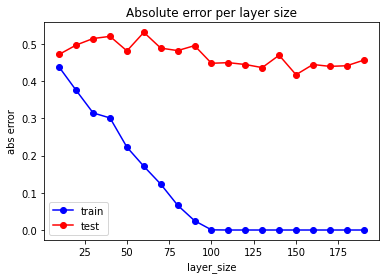

In [49]:
plt.plot(layer_range, layer_data['train_abs_error'], 'b-o', label='train')
plt.plot(layer_range, layer_data['test_abs_error'], 'r-o', label='test')
plt.xlabel('layer_size')
plt.ylabel('abs error')
plt.title('Absolute error per layer size')
plt.legend()
plt.show()
pass

#### Два слоя

In [50]:
warnings.filterwarnings('ignore')
max_iter = 7000 # change it to change analyzing time
min_size = 10
max_size = 200
step = 10
two_layers_range = range(min_size, max_size, step)

def mlp_analyze_first_layer_size(activation, solver, learning_rate, second_layer_size):
    return pd.Series(index = two_layers_range, data = [mlp_analyze(activation, solver, learning_rate, (x, second_layer_size), max_iter = max_iter) for x in two_layers_range])

two_layers_data = pd.DataFrame(columns = two_layers_range, index = two_layers_range, data = [mlp_analyze_first_layer_size('tanh', 'lbfgs', 'constant', x) for x in two_layers_range])
iters_count_table = two_layers_data.applymap(lambda x: x['iters_count'])
train_abs_error_table = two_layers_data.applymap(lambda x: x['train_abs_error'])
test_abs_error_table = two_layers_data.applymap(lambda x: x['test_abs_error'])
time_table = two_layers_data.applymap(lambda x: x['time'])

In [51]:
test_abs_error_table

,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190
10,0.484193,0.494176,0.484193,0.504992,0.446755,0.477537,0.466722,0.483361,0.480033,0.432612,0.469218,0.500000,0.466722,0.480865,0.467554,0.462562,0.465058,0.480865,0.470882
20,0.495840,0.514975,0.486689,0.494176,0.509151,0.494176,0.495008,0.480033,0.492512,0.454243,0.471714,0.487521,0.486689,0.466722,0.438436,0.476705,0.447587,0.462562,0.434276
30,0.504992,0.508319,0.495840,0.489185,0.467554,0.473378,0.472546,0.440100,0.452579,0.457571,0.435940,0.455907,0.445923,0.412646,0.476705,0.459235,0.452579,0.420133,0.447587
40,0.533278,0.539933,0.476705,0.475874,0.432612,0.465890,0.425957,0.446755,0.436772,0.434276,0.421797,0.435108,0.415973,0.442596,0.427621,0.415141,0.417637,0.454243,0.447587
50,0.523295,0.464226,0.451747,0.504160,0.480865,0.413478,0.443428,0.437604,0.430948,0.458403,0.420133,0.440932,0.444260,0.428453,0.438436,0.421797,0.425125,0.436772,0.431780
60,0.558236,0.452579,0.457571,0.441764,0.426789,0.426789,0.420965,0.415973,0.411814,0.406822,0.430948,0.415141,0.428453,0.419301,0.415141,0.433444,0.420133,0.427621,0.417637
70,0.513311,0.435940,0.459235,0.436772,0.420965,0.425957,0.446755,0.397671,0.434276,0.420965,0.430948,0.420965,0.414309,0.424293,0.409318,0.412646,0.421797,0.408486,0.400998
80,0.503328,0.476705,0.444260,0.422629,0.407654,0.432612,0.420133,0.408486,0.423461,0.391847,0.435940,0.405990,0.414309,0.417637,0.430116,0.420133,0.405158,0.412646,0.415973
90,0.496672,0.465058,0.411814,0.412646,0.402662,0.431780,0.440100,0.408486,0.410982,0.396007,0.427621,0.417637,0.398502,0.418469,0.405158,0.430116,0.414309,0.405158,0.413478
100,0.526622,0.458403,0.429285,0.450915,0.425957,0.410982,0.424293,0.419301,0.420133,0.434276,0.373544,0.415973,0.422629,0.419301,0.401830,0.408486,0.423461,0.419301,0.426789


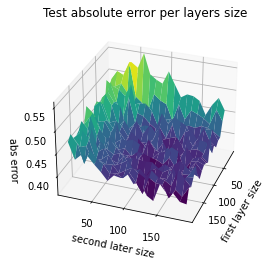

In [52]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Test absolute error per layers size')
x, y = np.meshgrid(two_layers_range, two_layers_range)
ax.plot_surface(x, y, test_abs_error_table.to_numpy(), cmap='viridis')
ax.view_init(30, 20)
ax.set_xlabel('first layer size')
ax.set_ylabel('second later size')
ax.set_zlabel('abs error')
plt.show()

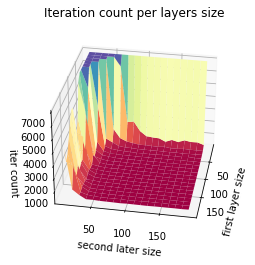

In [53]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Iteration count per layers size')
x, y = np.meshgrid(two_layers_range, two_layers_range)
ax.plot_surface(x, y, iters_count_table.to_numpy(), cmap='Spectral')
ax.view_init(30, 10)
ax.set_xlabel('first layer size')
ax.set_ylabel('second later size')
ax.set_zlabel('iter count')
plt.show()

In [54]:
opt_second_layer, opt_first_layer = np.unravel_index(np.argmin(test_abs_error_table), test_abs_error_table.shape)
opt_first_layer = step * opt_first_layer + min_size
opt_second_layer = step * opt_second_layer + min_size
opt_first_layer, opt_second_layer

(130, 110)

In [55]:
mlp_analyze('tanh', 'lbfgs', 'constant', ((opt_first_layer, opt_second_layer)))

{'iters_count': 225,
 'train_abs_error': 0.0,
 'test_abs_error': 0.36189683860232946,
 'time': 25.277405977249146}

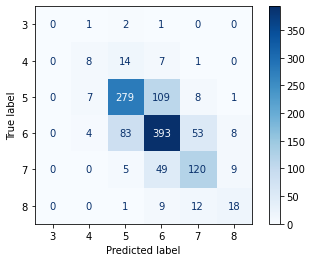

In [58]:
mlp_model = MLPClassifier(max_iter = max_iter, alpha = 0.0001,
                                random_state = 0, 
                                activation = 'tanh', 
                                solver = 'lbfgs',
                                hidden_layer_sizes = (130,110))
mlp_model.fit(in_train, out_train)
plot_confusion_matrix(mlp_model, in_test, out_test, cmap=plt.cm.Blues)
pass

In [59]:
mean_absolute_error(mlp_model.predict(in_train), out_train), mean_absolute_error(mlp_model.predict(in_test), out_test)

(0.0, 0.36189683860232946)

## Выбор alfa

In [60]:
max_iter = 1000 # change it to change analyzing time
alpha_range = np.logspace(-6, 1, 30)
alpha_data =pd.DataFrame(index = alpha_range, data = [mlp_analyze('tanh', 'lbfgs', 'constant', (opt_first_layer, opt_second_layer), alpha = x, max_iter = max_iter) for x in alpha_range])
alpha_data

,iters_count,train_abs_error,test_abs_error,time
0.000001,218,0.000000,0.401830,22.573344
0.000002,226,0.000000,0.394343,25.350260
0.000004,225,0.000000,0.414309,24.826266
0.000007,235,0.000000,0.407654,27.309934
0.000013,228,0.000000,0.410982,25.903147
0.000024,235,0.000000,0.405158,26.873937
0.000045,230,0.000000,0.410982,25.923460
0.000085,227,0.000000,0.396007,25.586999
0.000161,228,0.000000,0.419301,25.545966
0.000304,231,0.000000,0.387687,24.930454


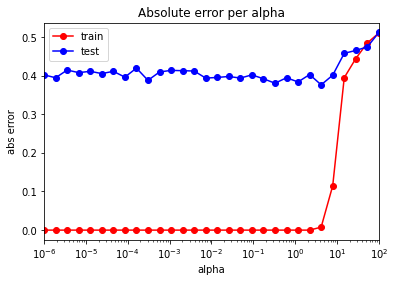

In [61]:
plt.semilogx(alpha_range, alpha_data['train_abs_error'], 'r-o', label = 'train')
plt.semilogx(alpha_range, alpha_data['test_abs_error'], 'b-o', label = 'test')
plt.xlim([np.min(alpha_range), np.max(alpha_range)])
plt.title('Absolute error per alpha')
plt.xlabel('alpha')
plt.ylabel('abs error')
plt.legend()
pass

In [68]:
max_iter = 5000 # change it to change analyzing time
alpha_range = np.logspace(-6, 1, 30)
alpha_data =pd.DataFrame(index = alpha_range, data = [mlp_analyze('tanh', 'lbfgs', 'constant', (opt_first_layer, opt_second_layer), alpha = x, max_iter = max_iter) for x in alpha_range])
alpha_data

,iters_count,train_abs_error,test_abs_error,time
0.000001,218,0.000000,0.401830,23.927851
0.000002,226,0.000000,0.406822,24.390332
0.000003,229,0.000000,0.400166,23.539647
0.000005,224,0.000000,0.416805,23.003054
0.000009,228,0.000000,0.399334,26.132140
0.000016,220,0.000000,0.400166,25.629573
0.000028,226,0.000000,0.432612,23.921014
0.000049,224,0.000000,0.415973,23.610041
0.000085,227,0.000000,0.396007,23.995920
0.000149,222,0.000000,0.406822,23.961229


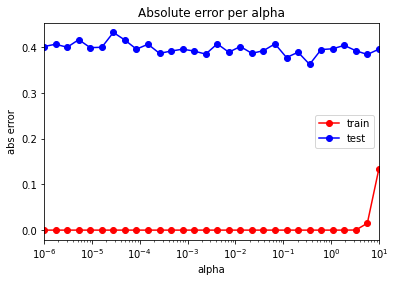

In [69]:
plt.semilogx(alpha_range, alpha_data['train_abs_error'], 'r-o', label = 'train')
plt.semilogx(alpha_range, alpha_data['test_abs_error'], 'b-o', label = 'test')
plt.xlim([np.min(alpha_range), np.max(alpha_range)])
plt.title('Absolute error per alpha')
plt.xlabel('alpha')
plt.ylabel('abs error')
plt.legend()
pass

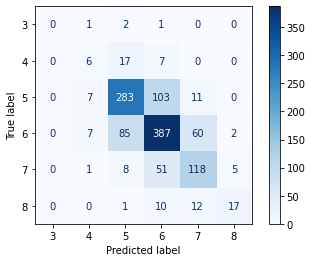

In [70]:
mlp_model = MLPClassifier(max_iter = max_iter, alpha = 0.356225,
                                random_state = 0, 
                                activation = 'tanh', 
                                solver = 'lbfgs',
                                hidden_layer_sizes = (130,110))
mlp_model.fit(in_train, out_train)
mean_absolute_error(mlp_model.predict(in_train), out_train), mean_absolute_error(mlp_model.predict(in_test), out_test)
plot_confusion_matrix(mlp_model, in_test, out_test, cmap=plt.cm.Blues)
pass

In [71]:
mean_absolute_error(mlp_model.predict(in_train), out_train), mean_absolute_error(mlp_model.predict(in_test), out_test)

(0.0, 0.36938435940099834)

## Выводы

Два слоя сети лучше, чем один.  
Оптимальное количество нейронов в слоях 130 и 110.  
Ввод регуляризации помогает улучшить результат, но альфа не должна быть слишком большой (приблизительно 10^0.5).  
Подбор различных алгоритмов и функций активации позволяет получить более хороший и стабильный результат (в данном случае lbfgs и tanh).  
Подбор параметров модели позволил улучшить ошибку с 0.46 до 0.36